# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this project, online perceptron algorithm for classification of Double Moon Dataset with different properties and XOR Dataset has been used. 
### <span style='font-family:"Times New Roman"'>The algorithm classifies the dataset in one epoch (one data point at a time).

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib
import math
plt.style.use('ggplot')
label = [-1,1]
colors = ['g','b']

### <span style='font-family:"Times New Roman"'>Implemented Functions:  

In [2]:
def circGuass(N,Me,Var):
    dimension = len(Me)
    a = np.array(Me)
    p = np.random.randn(dimension,N)
    h = np.tile(a, (2, N//2))
    x = math.sqrt(Var) * p + h
    return x

In [3]:
def sample_ring(center,r1,r2,n_points):
    nd = center.size
    x = np.random.normal(size=(n_points, nd))
    sq = np.sum(x**2,axis=1)
    z = (r2-r1)/r2
    fr = (r2-r1)*gammainc(nd/2**z,sq/2**z)**(1/nd)/np.sqrt(sq) + r1/np.sqrt(sq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,nd))
    p = center + np.multiply(x,frtiled)
    return p

In [4]:
def predict(X,w):
    return np.sign(np.dot(X, w))

In [5]:
def perceptron_sgd1(X, Y,epochs):
    """
    X: data matrix without bias.
    Y: target
    """
    # add bias to X's first column
    ones = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X1 = np.append(ones, X, axis=1)


    w = np.zeros(X1.shape[1])
    final_iter = epochs
    Cost = []
    misclass = []
    weight = []
    
    for epoch in range(epochs):
        print("\n")
        print("epoch: 1")
        W = []
        misclassified = 0
        for i, x in enumerate(X1):
            y = Y[i]
            h = np.dot(x, w)*y

            if h <= 0:
                w = w + x*y
                misclassified += 1
                print('misclassified? yes  w: {} '.format(w,i))
                misclass = np.append(misclass, [x[1],x[2]], axis=0)
                J = w[1:3].T*[x[1],x[2]]
                J = J**2
                J = np.sum(J)


            else:
                print('misclassified? no  w: {}'.format(w))
                pass
            weight = np.append(weight,w,axis=0)
        if misclassified == 0:
            final_iter = epoch
            break

    return w, final_iter , epoch , Cost, W, weight

In [6]:
def Mc(X, Y,w,epochs):
    """
    X: data matrix without bias.
    Y: target
    """
    # add bias to X's first column
    ones = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X1 = np.append(ones, X, axis=1)


    final_iter = epochs

    for epoch in range(epochs):

        misclassified = 0
        misclass = []
        for i, x in enumerate(X1):
            y = Y[i]
            h = np.dot(x, w)*y

            if h <= 0:
                misclassified += 1
                misclass = np.append(misclass, [x[1],x[2]], axis=0)

            else:
                pass

        if misclassified == 0:
            final_iter = epoch
            break
            

    return misclass 

In [7]:
def perceptron_sgd(X, Y,epochs):
    """
    X: data matrix without bias.
    Y: target
    """
    # add bias to X's first column
    ones = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X1 = np.append(ones, X, axis=1)


    w = np.zeros(X1.shape[1])
    final_iter = epochs
    Cost = []
    misclass = []
    Mis = []
    J = []
    

    for epoch in range(epochs):
        print("\n")
        print("epoch: {} {}".format(epoch, '-'*30))
        W = []
        misclassified = 0
        for i, x in enumerate(X1):
            y = Y[i]
            h = np.dot(x, w)*y
            if h <= 0:
                w = w + x*y
                W = np.append(W,w)
                w = W[0:3]
                misclassified += 1
                print('misclassified? yes  w: {} '.format(w,i))
                misclass = np.append(misclass, [x[1],x[2]], axis=0)



            else:
                print('misclassified? no  w: {}'.format(w))
                pass
        if misclassified == 0:
            final_iter = epoch
            break
        Mis = np.append(Mis, misclassified) 

    return w, final_iter , epoch , Cost, W, Mis

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Double Moon Dataset: 

In [8]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]  
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
np.random.shuffle(data)

In [9]:
epochs = 1
X_train = data[:500,[0,1]]
Y_train = data[:500,2]
X_test = data[501:,[0,1]]
Y_test = data[501:,2]

# fit perceptron 
w, final_iter , epoch, Cost, W, weight = perceptron_sgd1(X_train,Y_train,epochs)
print(Cost)
print('w = ', w)
w.shape
print(W)


epochs = 1
X_train = data[:,[0,1]]
Y_train = data[:,2]


# fit perceptron 
misclass = Mc(X_train,Y_train,w,epochs)
x = misclass[::2]
y = misclass[1::2]
result = np.stack((x, y), axis=-1)



epoch: 1
misclassified? yes  w: [-1.         -1.29963925  0.32823021] 
misclassified? no  w: [-1.         -1.29963925  0.32823021]
misclassified? no  w: [-1.         -1.29963925  0.32823021]
misclassified? no  w: [-1.         -1.29963925  0.32823021]
misclassified? no  w: [-1.         -1.29963925  0.32823021]
misclassified? yes  w: [ 0.         -0.3399255   0.80986914] 
misclassified? yes  w: [-1.         -0.4653171   0.51533668] 
misclassified? no  w: [-1.         -0.4653171   0.51533668]
misclassified? no  w: [-1.         -0.4653171   0.51533668]
misclassified? no  w: [-1.         -0.4653171   0.51533668]
misclassified? no  w: [-1.         -0.4653171   0.51533668]
misclassified? no  w: [-1.         -0.4653171   0.51533668]
misclassified? yes  w: [0.         0.12387358 1.25842303] 
misclassified? no  w: [0.         0.12387358 1.25842303]
misclassified? no  w: [0.         0.12387358 1.25842303]
misclassified? no  w: [0.         0.12387358 1.25842303]
misclassified? no  w: [0.        

misclassified? no  w: [ 0.         -1.56681282  5.01544673]
misclassified? no  w: [ 0.         -1.56681282  5.01544673]
misclassified? no  w: [ 0.         -1.56681282  5.01544673]
misclassified? yes  w: [-1.         -1.77900545  4.58446838] 
misclassified? no  w: [-1.         -1.77900545  4.58446838]
misclassified? no  w: [-1.         -1.77900545  4.58446838]
misclassified? yes  w: [ 0.         -1.05663255  4.82377671] 
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -1.05663255  4.82377671]
misclassified? no  w: [ 0.         -

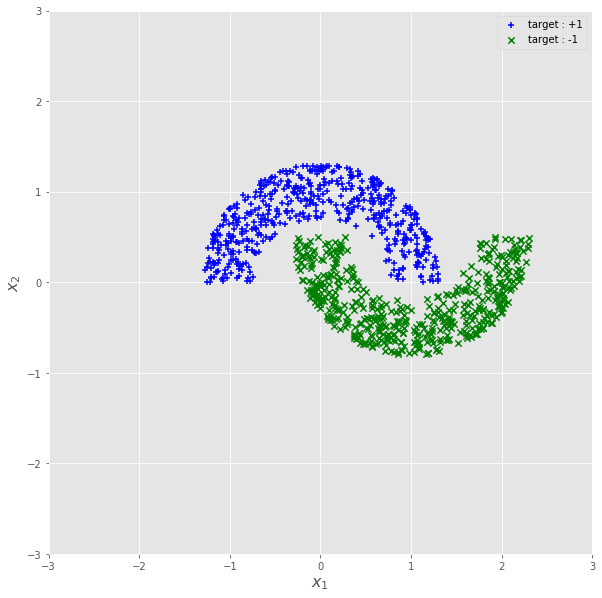

In [10]:
plt.figure(figsize=(10,10))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = df.plot.scatter(0,1, marker='+', c='b',label = "target : +1", s=40, ax = ax)
ax = dg.plot.scatter(0,1, marker='x', c='g',label = "target : -1", s=40, ax = ax) 
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

In [11]:
XN = dg.values
XP = df.values

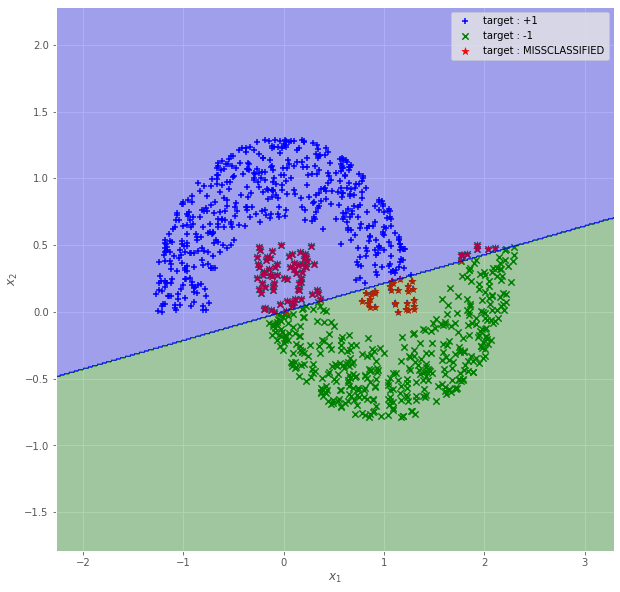

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(result[:,0],result[:,1],marker='*', c='r',label = "target : MISSCLASSIFIED", s=60)
plt.legend()
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))
# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
scores = predict(Xvals, w)
# Plot contour plot
scores = scores.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.3,  cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()
plt.close()

In [13]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.1])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0]  
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
np.random.shuffle(data)

In [14]:
epochs = 1
X_train = data[:500,[0,1]]
Y_train = data[:500,2]
X_test = data[501:,[0,1]]
Y_test = data[501:,2]

# fit perceptron 
w, final_iter , epoch, Cost, W, weight = perceptron_sgd1(X_train,Y_train,epochs)
print(Cost)
print('w = ', w)

epochs = 1
X_train = data[:,[0,1]]
Y_train = data[:,2]


# fit perceptron 
misclass = Mc(X_train,Y_train,w,epochs)
x = misclass[::2]
y = misclass[1::2]
result = np.stack((x, y), axis=-1)



epoch: 1
misclassified? yes  w: [ 1.         -0.79354741  0.82223416] 
misclassified? yes  w: [ 0.         -0.66375156  1.27707757] 
misclassified? no  w: [ 0.         -0.66375156  1.27707757]
misclassified? no  w: [ 0.         -0.66375156  1.27707757]
misclassified? no  w: [ 0.         -0.66375156  1.27707757]
misclassified? no  w: [ 0.         -0.66375156  1.27707757]
misclassified? no  w: [ 0.         -0.66375156  1.27707757]
misclassified? no  w: [ 0.         -0.66375156  1.27707757]
misclassified? yes  w: [1.         0.07891016 1.58286214] 
misclassified? no  w: [1.         0.07891016 1.58286214]
misclassified? no  w: [1.         0.07891016 1.58286214]
misclassified? no  w: [1.         0.07891016 1.58286214]
misclassified? no  w: [1.         0.07891016 1.58286214]
misclassified? no  w: [1.         0.07891016 1.58286214]
misclassified? yes  w: [ 0.         -1.88968444  2.11804757] 
misclassified? no  w: [ 0.         -1.88968444  2.11804757]
misclassified? no  w: [ 0.         -1.8

misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51143601  5.34370085]
misclassified? no  w: [ 0.         -0.51

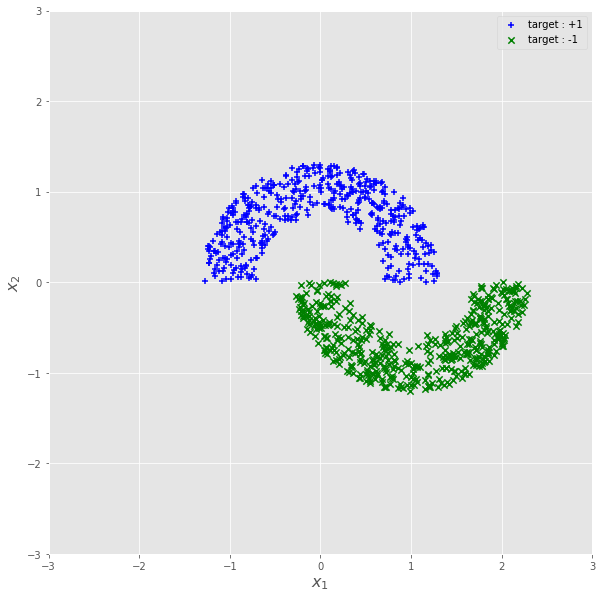

In [15]:
plt.figure(figsize=(10,10))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = df.plot.scatter(0,1, marker='+', c='b',label = "target : +1", s=40, ax = ax)
ax = dg.plot.scatter(0,1, marker='x', c='g',label = "target : -1", s=40, ax = ax) 
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

In [16]:
XN = dg.values
XP = df.values

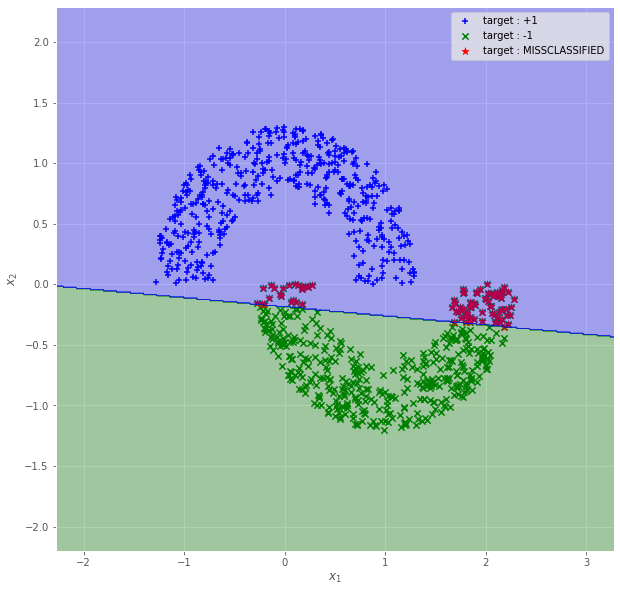

In [17]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(result[:,0],result[:,1],marker='*', c='r',label = "target : MISSCLASSIFIED", s=60)
plt.legend()

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))
# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
scores = predict(Xvals, w)
# Plot contour plot
scores = scores.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.3,  cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()
plt.close()

In [18]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,-0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= -0.5]  
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
np.random.shuffle(data)

In [19]:
epochs = 1
X_train = data[:500,[0,1]]
Y_train = data[:500,2]
X_test = data[501:,[0,1]]
Y_test = data[501:,2]

# fit perceptron 
w, final_iter , epoch, Cost, W, weight = perceptron_sgd1(X_train,Y_train,epochs)
print('w = ', w)


epochs = 1
X_train = data[:,[0,1]]
Y_train = data[:,2]


# fit perceptron 
misclass = Mc(X_train,Y_train,w,epochs)
x = misclass[::2]
y = misclass[1::2]
result = np.stack((x, y), axis=-1)



epoch: 1
misclassified? yes  w: [-1.         -0.10768084  0.72104883] 
misclassified? no  w: [-1.         -0.10768084  0.72104883]
misclassified? yes  w: [ 0.         -0.76074669  1.52644149] 
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? no  w: [ 0.         -0.76074669  1.52644149]
misclassified? yes  w: [1.         0.39852377 1.73270082] 
misclassified? yes  w: [0.         0.20614976 2.26489394] 
misclassified? no  w: [0.         0.20614976 2.26489394]
misclassified? no  w: [0.         0.20614976 2.26489394]
misclassified? no  w: [0.         0.20614976 2.26489394]
misclassified? no  w: [0.         0.20614976 2.26489394]
misclassified? no  w: [0.         0.206

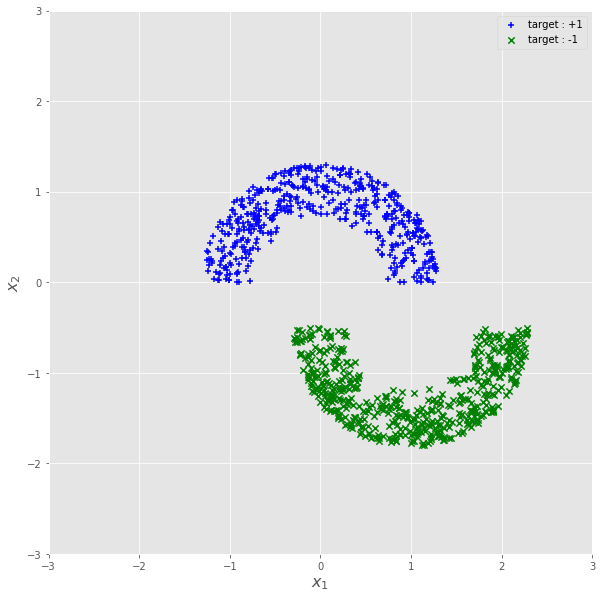

In [20]:
plt.figure(figsize=(10,10))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = df.plot.scatter(0,1, marker='+', c='b',label = "target : +1", s=40, ax = ax)
ax = dg.plot.scatter(0,1, marker='x', c='g',label = "target : -1", s=40, ax = ax) 
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

In [21]:
XN = dg.values
XP = df.values

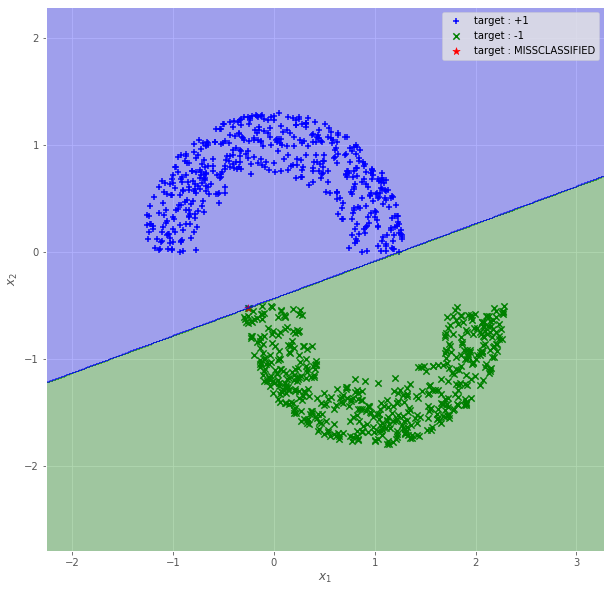

In [22]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(result[:,0],result[:,1],marker='*', c='r',label = "target : MISSCLASSIFIED", s=60)
plt.legend()

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))
# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
scores = predict(Xvals, w)
# Plot contour plot
scores = scores.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.3,  cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()
plt.close()

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> XOR Dataset: 

In [23]:
M1 = 0
Var = 1
N = 500
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
np.random.shuffle(data)

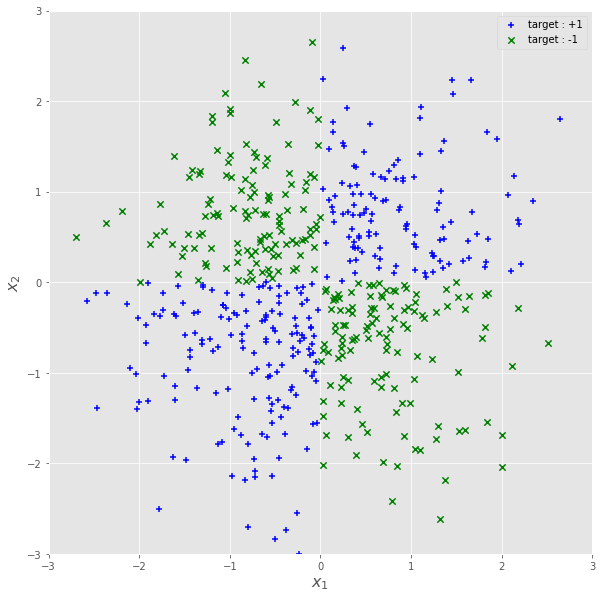

In [24]:
plt.figure(figsize=(10,10))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = df.plot.scatter(0,1, marker='+', c='b',label = "target : +1", s=40, ax = ax)
ax = dg.plot.scatter(0,1, marker='x', c='g',label = "target : -1", s=40, ax = ax)
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

In [26]:
epochs = 1
X_train = data[:600,[0,1]]
Y_train = data[:600,2]
X_test = data[601:,[0,1]]
Y_test = data[601:,2]
# fit perceptron
w, final_iter , epoch, Cost, W , Mis= perceptron_sgd(X_train,Y_train,epochs)
print('w = ', w)



epoch: 0 ------------------------------
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? no  w: [1.   

misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? yes  w: [1.         0.83692194 0.18216015] 
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassified? no  w: [1.         0.83692194 0.18216015]
misclassifi

In [27]:
epochs = 1
X_train = data[:,[0,1]]
Y_train = data[:,2]
# fit perceptron
misclass = Mc(X_train,Y_train,w,epochs)
x = misclass[::2]
y = misclass[1::2]
result = np.stack((x, y), axis=-1)

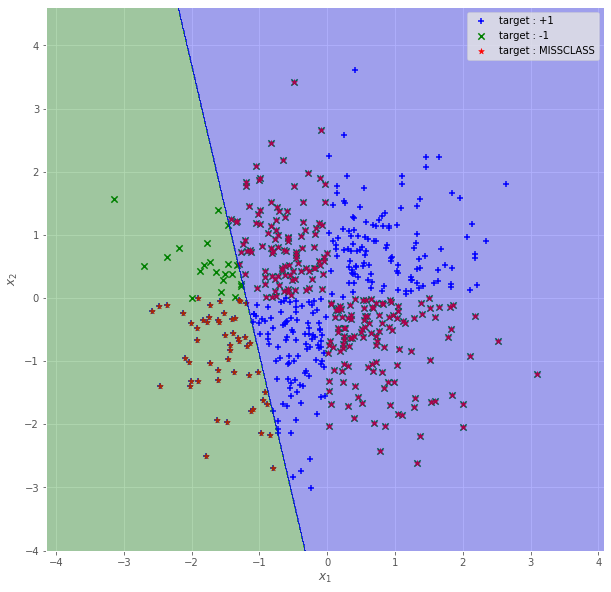

In [31]:
XN = dg.values
XP = df.values
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(result[:,0],result[:,1],marker='*', c='r',label = "target : MISSCLASS")
plt.legend()
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
np.arange(y_min, y_max, 0.01))
xxr = xx.ravel()
yyr = yy.ravel()
ones = np.ones(len(xxr))
# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
scores = predict(Xvals, w)
# Plot contour plot
scores = scores.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.3,  cmap=matplotlib.colors.ListedColormap(colors))
# show the plot
plt.show()
plt.close()